In [531]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using Unitful
using FFTW
using Base: Fix1, Fix2

pyplot()
j=im
theme(:dracula)
default(textcolor=:white)


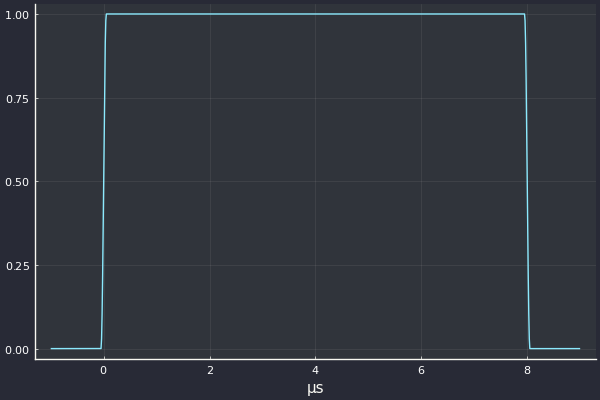

In [532]:
T_TR = 100u"ns"
Δ_F = 20u"MHz"/64
T_SHORT = 8u"μs"
T_LONG = 8u"μs"
T_GI2 = 1.6u"μs"

function w(T, t)
    if t < -T_TR/2 
        return 0
    elseif t < T_TR/2
        return sin(π/2*(0.5+t/T_TR))^2
    elseif t < T-T_TR/2
        return 1
    elseif t < T+T_TR/2
        return sin(π/2*(0.5-(t-T)/T_TR))^2
    else
        return 0
    end
end

t = range(-1u"μs", 9u"μs", length=1000)


plot(t, Fix1(w, T_SHORT), legend=false)

In [533]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)

L = OffsetArray([1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 0,
1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1], -26:26)

r_l(t) = w(T_LONG,t)*sum(L[k]*exp(j*k*2π*Δ_F*(t-T_GI2)) for k in eachindex(L))

r_s(t) = w(T_SHORT,t)*sum(S[k]*exp(j*k*2π*Δ_F*t) for k in eachindex(S))

r_s (generic function with 1 method)

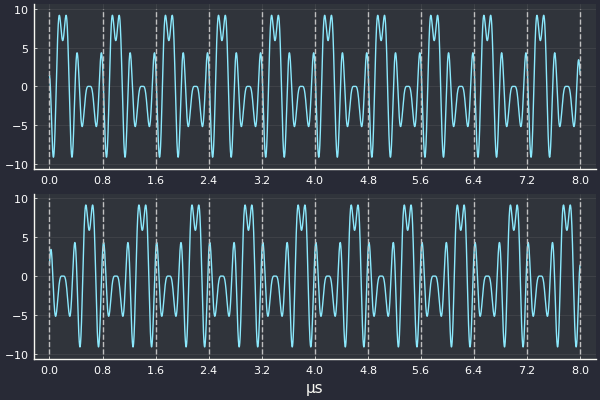

In [534]:
t = range(0u"μs", 8u"μs", length=5000)

rs = r_s.(t)

p1 = plot(t, real(rs), xlabel="")
p2 = plot(t, imag(rs))
for i in 0:0.8:8
    plot!(p1, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend=false, xticks=0:0.8:8)

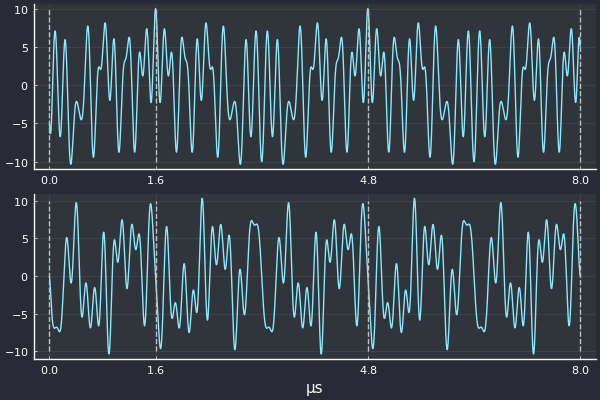

In [535]:
rl = r_l.(t)

p1 = plot(t, real(rl), xlabel="")
p2 = plot(t, imag(rl))

for i in [0,1.6,4.8,8]
    plot!(p1, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend = false, xticks=[0,1.6,4.8,8])

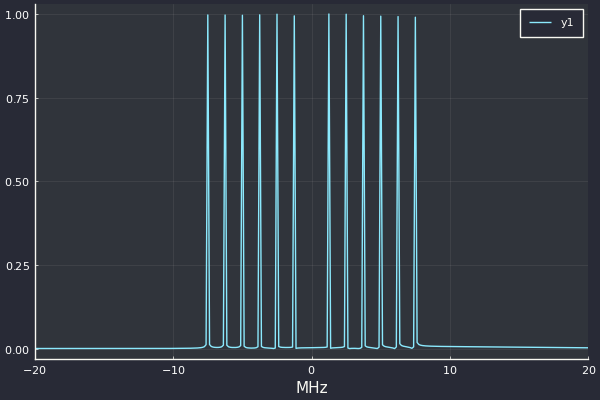

In [536]:
f = fftfreq(length(t), 1/(t[2]-t[1]) |> u"MHz")
plot(f |> fftshift, abs.(fft(rs))./maximum(abs.(fft(rs)))|>fftshift, xlim=(-20u"MHz", 20u"MHz"))

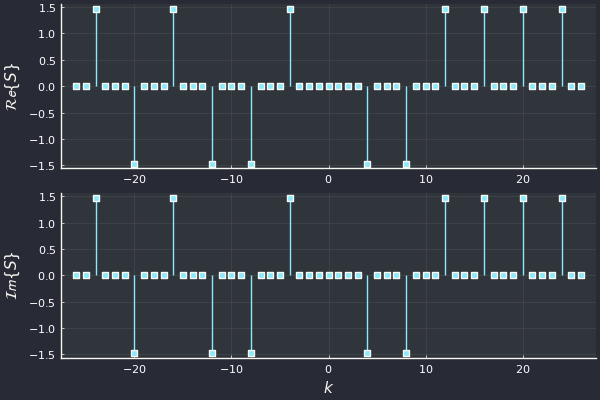

In [537]:

p1 = plot(real(S), line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(imag(S), line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

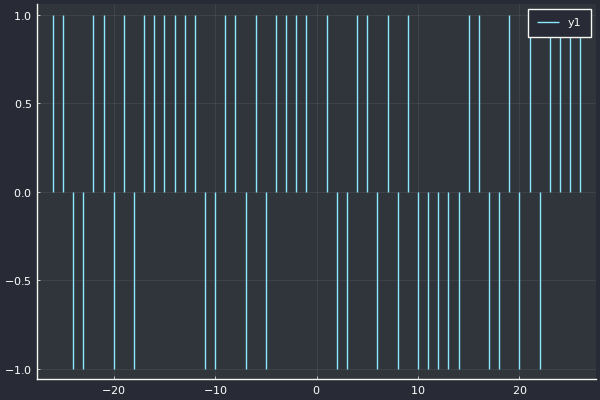

In [538]:
plot(L, line=:stem)

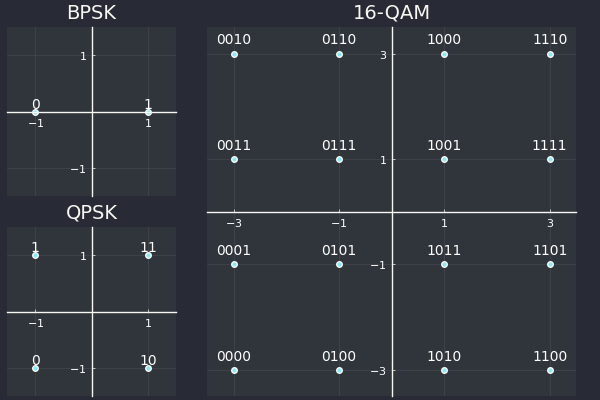

In [539]:
I = [-1, 1]
Q = [ 0, 0]
c = [ 0, 1]
p1 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-1.5, 1.5), ylim=(-1.5,1.5),title="BPSK", xticks=[-1,1], yticks=[-1,1])
annotate!(I, Q.+0.125, Plots.text.(c, :white, 10), legend=false)
I = [-1,-1, 1, 1]
Q = [-1, 1,-1, 1]
c = [00,01,10,11]
p2 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-1.5, 1.5), ylim=(-1.5,1.5),title="QPSK", xticks=[-1,1], yticks=[-1,1])
annotate!(I, Q.+0.125, Plots.text.(c, :white, 10), legend=false)
I = vcat([repeat([i],4) for i in [-3,-1,3,1]]...)
Q = repeat([-3,-1,1,3],4)
c = ["0000","0001","0011","0010","0100","0101","0111","0110","1100","1101","1111","1110","1010","1011","1001","1000"]
lim = 3.5
p3 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-lim,lim), ylim=(-lim,lim), title="16-QAM", ticks=[-3,-1,1,3], yticks=[-3,-1,1,3])
annotate!(I, Q.+0.25, Plots.text.(c, :white, 10),legend=:false)
px = plot(p1,p2, layout=(2,1))
plot(px,p3, layout=grid(1,2, widths=[0.3, 0.7]))

In [540]:
ktoi(N, k) = N/16*(k%16)+floor(k/16) |> Int
itoj(N, s, i) = s*floor(i/s)+(i+N-floor((16*i)/N))%s |> Int
jtoi(N, s, j) = s*floor(j/s)+(j+floor((16*j)/N))%s |> Int
itok(N, i) = 16*i-(N-1)*floor((16*i)/N) |> Int

itok (generic function with 1 method)

In [541]:
N = 192
s = 2
ks = 0:N-1
println(ks |> collect)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [542]:
is = ktoi.(N, ks) 
println(is)
js = itoj.(N,s,is)
println(is)

[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198, 216, 234, 252, 270, 1, 19, 37, 55, 73, 91, 109, 127, 145, 163, 181, 199, 217, 235, 253, 271, 2, 20, 38, 56, 74, 92, 110, 128, 146, 164, 182, 200, 218, 236, 254, 272, 3, 21, 39, 57, 75, 93, 111, 129, 147, 165, 183, 201, 219, 237, 255, 273, 4, 22, 40, 58, 76, 94, 112, 130, 148, 166, 184, 202, 220, 238, 256, 274, 5, 23, 41, 59, 77, 95, 113, 131, 149, 167, 185, 203, 221, 239, 257, 275, 6, 24, 42, 60, 78, 96, 114, 132, 150, 168, 186, 204, 222, 240, 258, 276, 7, 25, 43, 61, 79, 97, 115, 133, 151, 169, 187, 205, 223, 241, 259, 277, 8, 26, 44, 62, 80, 98, 116, 134, 152, 170, 188, 206, 224, 242, 260, 278, 9, 27, 45, 63, 81, 99, 117, 135, 153, 171, 189, 207, 225, 243, 261, 279, 10, 28, 46, 64, 82, 100, 118, 136, 154, 172, 190, 208, 226, 244, 262, 280, 11, 29, 47, 65, 83, 101, 119, 137, 155, 173, 191, 209, 227, 245, 263, 281, 12, 30, 48, 66, 84, 102, 120, 138, 156, 174, 192, 210, 228, 246, 264, 282, 13, 31, 49, 67, 85, 103, 121, 139, 157, 175,

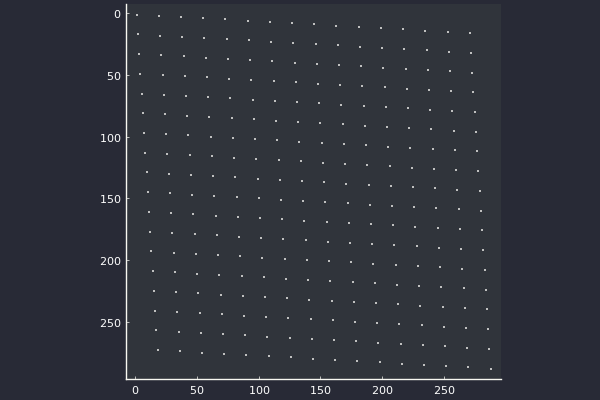

In [543]:
using SparseArrays
params=(markercolor=:silver, markersize=2, markershape=:square)
spy(sparse(ks.+1 ,is.+1, repeat([1], N)); params...)

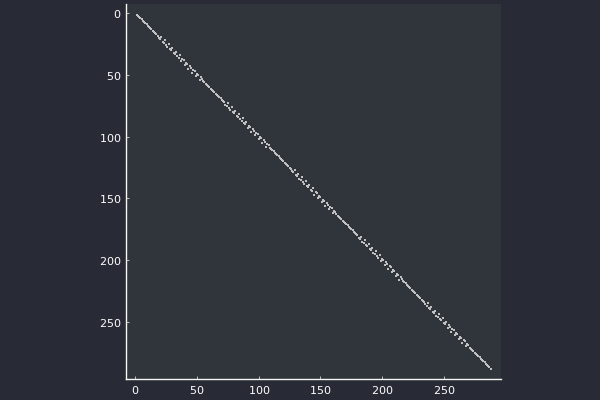

In [544]:
spy(sparse(is.+1 ,js.+1, repeat([1], N)); params...)

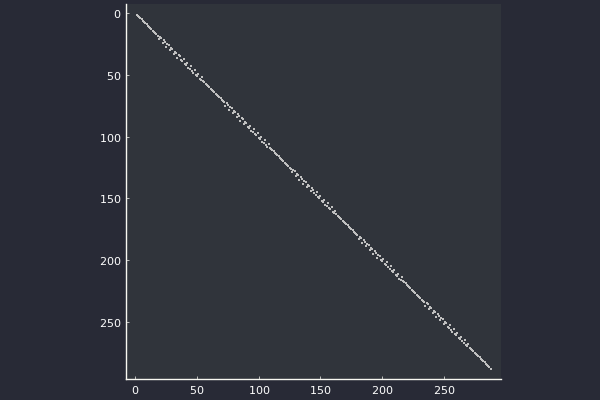

In [545]:
spy(sparse(js.+1,is.+1, repeat([1], N)); params...)

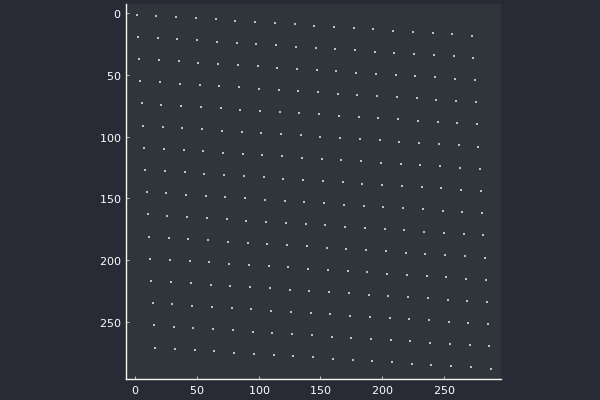

In [546]:
spy(sparse(is.+1 ,ks.+1, repeat([1], N)); params...)

In [547]:
#using TikzPictures
#
#step = 100
#s1 = join("\\draw ($k,$(0*step)) -- ($i,$(1*step));\n" for (k, i) in zip(ks, is))
#s2 = join("\\draw ($i,$(1*step)) -- ($j,$(2*step));\n" for (i,j) in zip(is, js))
#s3 = join("\\draw ($i,$(2*step)) -- ($j,$(3*step));\n" for (i,j) in zip(is, js))
#s4 = join("\\draw ($k,$(3*step)) -- ($i,$(4*step));\n" for (k, i) in zip(ks, is))
#
#tp = TikzPicture(s1*s2*s3*s4)
#save(PDF("test"), tp)


"\\draw (0,300) -- (0,400);\n\\draw (1,300) -- (18,400);\n\\draw (2,300) -- (36,400);\n\\draw (3,300) -- (54,400);\n\\draw (4,300) -- (72,400);\n\\draw (5,300) -- (90,400);\n\\draw (6,300) -- (108,400);\n\\draw (7,300) -- (126,400);\n\\draw (8,300) -- (144,400);\n\\draw (9,300) -- (162,400" ⋯ 7880 bytes ⋯ "\\draw (279,300) -- (143,400);\n\\draw (280,300) -- (161,400);\n\\draw (281,300) -- (179,400);\n\\draw (282,300) -- (197,400);\n\\draw (283,300) -- (215,400);\n\\draw (284,300) -- (233,400);\n\\draw (285,300) -- (251,400);\n\\draw (286,300) -- (269,400);\n\\draw (287,300) -- (287,400);\n"

┌ Warning: test.pdf already exists, overwriting!
└ @ TikzPictures ~/.julia/packages/TikzPictures/4zjh8/src/TikzPictures.jl:333
